# Lab work

# Colorful equalized histogram without HSV

In [71]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def CDF(img):
    histogram = np.zeros(256)
    img_h, img_w = img.shape
    for i in range(img_h):
        for j in range(img_w):
            histogram[img[i][j]] += 1
    total_pixel = img_h*img_w
    pdf = histogram / total_pixel
    cdf = pdf

    s = pdf

    sum= 0.0
    L = 256
    
    for i in range (256):
        sum += pdf[i]
        cdf[i] = sum
        s[i] = round((L-1) * cdf[i])
    return cdf

def EqualizedHistogram(img):
    equalized_img =  np.zeros_like(img)
    img_h, img_w = img.shape
    total_pixel = img_h * img_w
    histogram = np.zeros(256)
    for i in range(img_h):
        for j in range(img_w):
            histogram[img[i][j]] += 1

    #plt.plot(histogram)
    #print(histogram)
    #plt.show()
    pdf = histogram / total_pixel
    cdf = pdf

    s = pdf

    sum= 0.0
    L = 256

    for i in range (256):
        sum += pdf[i]
        cdf[i] = sum
        s[i] = round((L-1) * cdf[i])

    #plt.plot(cdf)
    #plt.show()

    for i in range(img_h):
        for j in range(img_w):
            equalized_img[i][j] = s[img[i][j]]
        
    return equalized_img


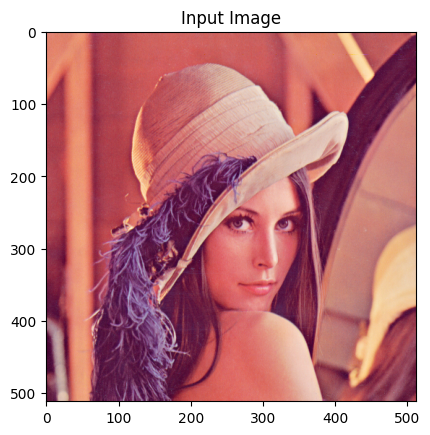

In [72]:
image = cv2.imread(r"C:\Users\srsau.DESKTOP-T9VMR06.000\Desktop\109_image\lena.png")
#image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image[:,:,::-1])
plt.title("Input Image")
plt.show()



Text(0.5, 1.0, 'Red')

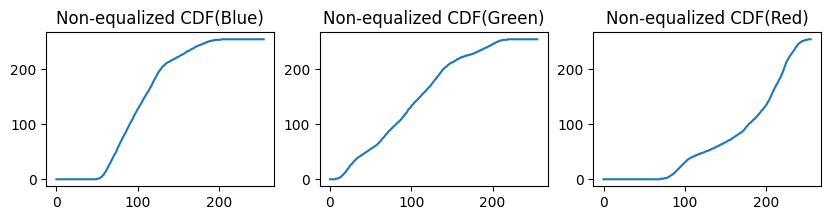

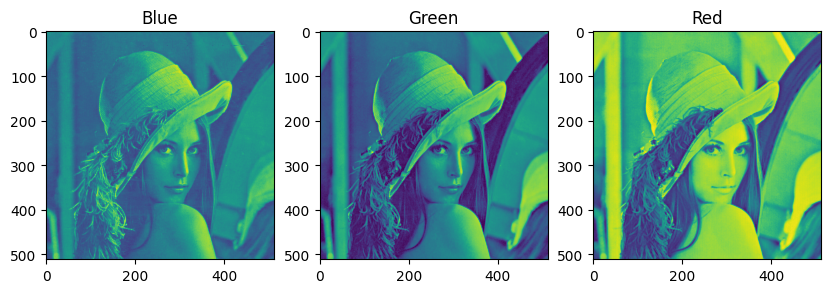

In [73]:
b,g,r = cv2.split(image)

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,2))
ax1.set_title("Non-equalized CDF(Blue)")
ax1.plot(CDF(b))

ax2.set_title("Non-equalized CDF(Green)")
ax2.plot(CDF(g))

ax3.set_title("Non-equalized CDF(Red)")
ax3.plot(CDF(r))

fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(b)
ax1.set_title("Blue")

ax2.imshow(g)
ax2.set_title("Green")

ax3.imshow(r)
ax3.set_title("Red")



Text(0.5, 1.0, 'Equalized red')

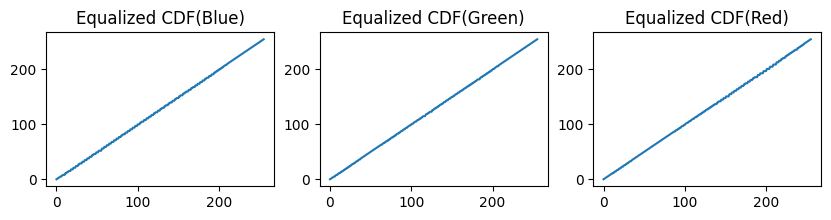

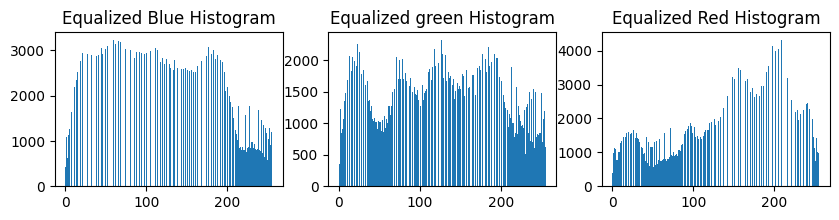

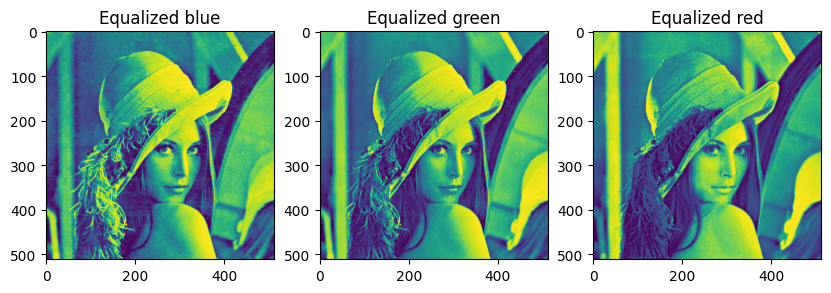

In [74]:
e_b = EqualizedHistogram(b)
e_g = EqualizedHistogram(g)
e_r = EqualizedHistogram(r)


fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,2))
ax1.set_title("Equalized CDF(Blue)")
ax1.plot(CDF(e_b))

ax2.set_title("Equalized CDF(Green)")
ax2.plot(CDF(e_g))

ax3.set_title("Equalized CDF(Red)")
ax3.plot(CDF(e_r))


fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,2))
ax1.set_title("Equalized Blue Histogram")
ax1.hist(e_b.ravel(),256,[0,256])

ax2.set_title("Equalized green Histogram")
ax2.hist(e_g.ravel(),256,[0,256])

ax3.set_title("Equalized Red Histogram")
ax3.hist(e_r.ravel(),256,[0,256])


fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,5))
ax1.imshow(e_b)
ax1.set_title("Equalized blue")

ax2.imshow(e_g)
ax2.set_title("Equalized green")

ax3.imshow(e_r)
ax3.set_title("Equalized red")


Text(0.5, 1.0, 'Merged BGR image')

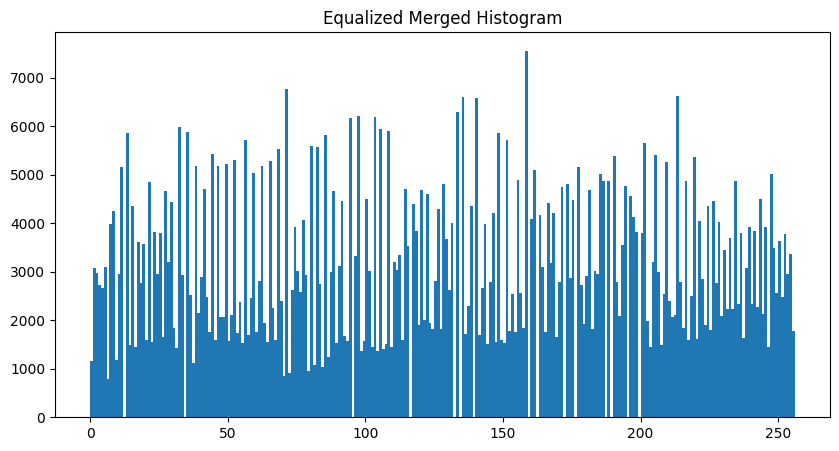

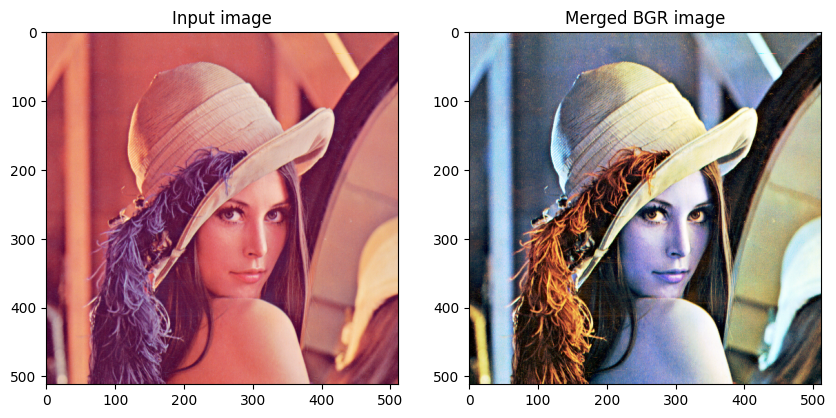

In [75]:
merged = cv2.merge((e_b,e_g,e_r))

fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
ax1.set_title("Equalized Merged Histogram")
ax1.hist(merged.ravel(),256,[0,256])   
                                        
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.imshow(image[:,:,::-1])
ax1.set_title("Input image")

ax2.imshow(merged)
ax2.set_title("Merged BGR image")

# Colorful equalized histogram with HSV

Text(0.5, 1.0, 'Merged HSV2RGB image')

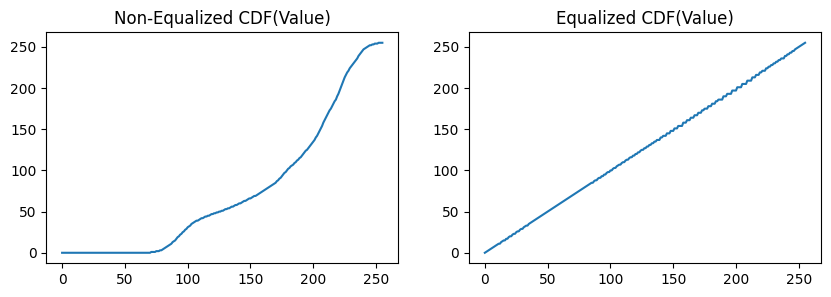

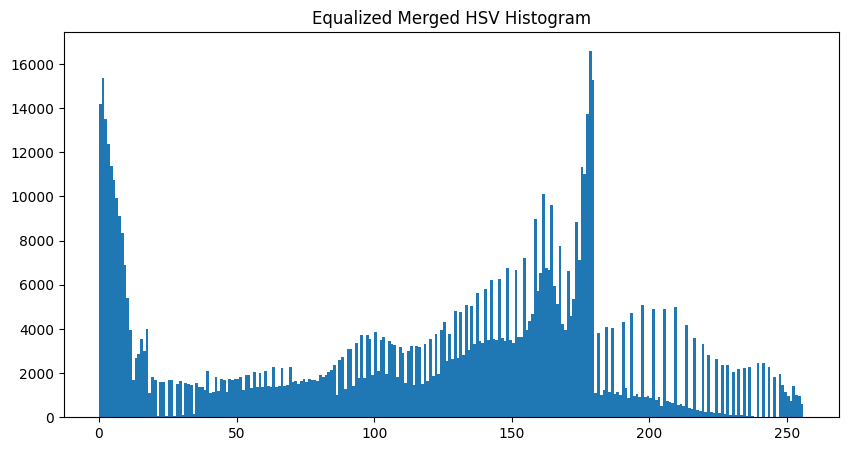

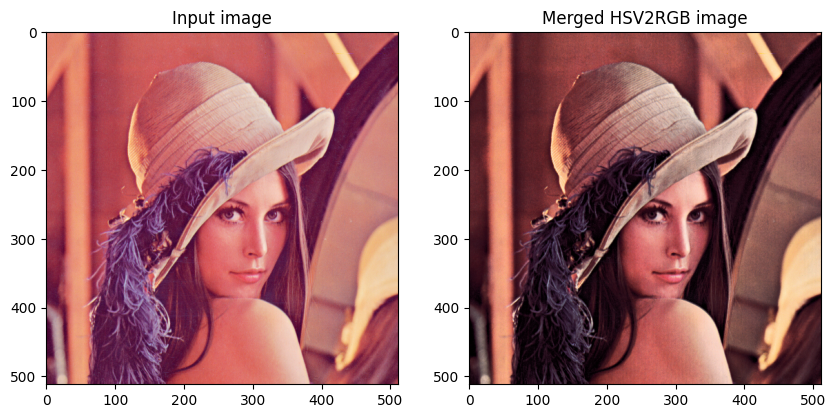

In [93]:
image2 = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(image2)
e_v = EqualizedHistogram(v)
merged_hsv = cv2.merge((h,s,e_v))
merged_hsv_res = cv2.cvtColor(merged_hsv,cv2.COLOR_HSV2RGB)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,3))
ax1.set_title("Non-Equalized CDF(Value)")
ax1.plot(CDF(v))

ax2.set_title("Equalized CDF(Value)")
ax2.plot(CDF(e_v))

fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
ax1.set_title("Equalized Merged HSV Histogram")
ax1.hist(merged_hsv.ravel(),256,[0,256])


fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

ax1.imshow(image[:,:,::-1])
ax1.set_title("Input image")

ax2.imshow(merged_hsv_res)
ax2.set_title("Merged HSV2RGB image")






# Histogram matching

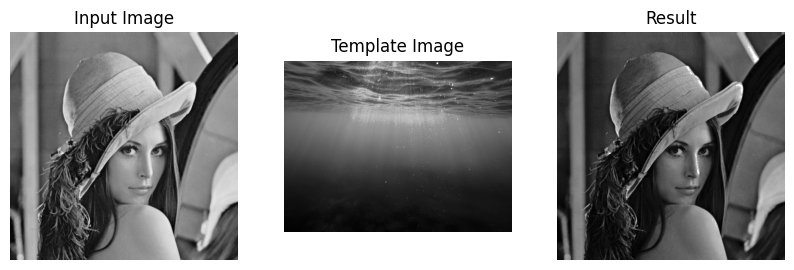

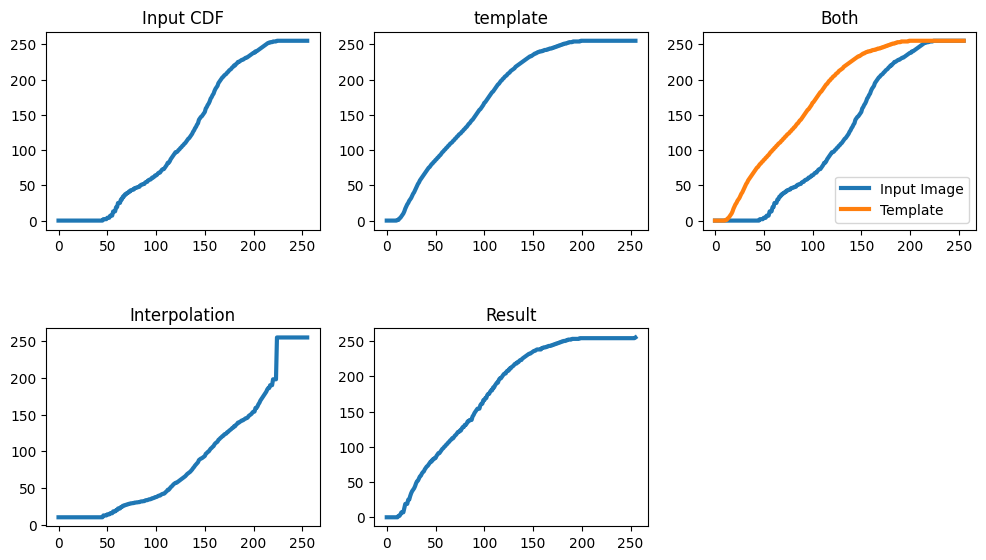

In [94]:
# get the CDF
def CDF(img):
    histogram = np.zeros(256)
    img_h, img_w = img.shape
    for i in range(img_h):
        for j in range(img_w):
            histogram[img[i][j]] += 1
    total_pixel = img_h*img_w
    pdf = histogram / total_pixel
    cdf = pdf

    s = pdf

    sum= 0.0
    L = 256
    
    for i in range (256):
        sum += pdf[i]
        cdf[i] = sum
        s[i] = round((L-1) * cdf[i])
    return cdf

# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixelValues)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

#preview CDF histogram

def plotCDFResult(imInput, imTemplate, imResult):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,))
    ax1.set_title("Input CDF")
    ax1.plot(imInput)

    ax2.set_title("Template Image CDF")
    ax2.plot(imTemplate)

    ax3.set_title("Result")
    ax3.plot(imResult)

# Preview the result
def plotResult(imInput, imTemplate, imResult):
    plt.figure(figsize=(10,7))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(imInput, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Template Image')
    plt.imshow(imTemplate, cmap='gray')
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Result')
    plt.imshow(imResult, cmap='gray')
    plt.axis('off')
    plt.show()

def plotCDFRes(cdfInput,cdfTemplate,imageResult):
    plt.figure(figsize=(12,5))
    plt.subplot(2,3,1)
    plt.plot(cdfInput,linewidth=3)
    plt.title("Input CDF")


    plt.subplot(2,3,2)
    plt.plot(cdfTemplate,linewidth=3)
    plt.title("template")

    plt.subplot(2,3,3)
    plt.plot(cdfInput, linewidth=3, label='Input Image')
    plt.plot(cdfTemplate, linewidth=3, label='Template')
    plt.title("Both")
    plt.legend()
  
    plt.subplots_adjust(top = 0.99, bottom=0.001, hspace=.5, wspace=0.2)
    plt.subplot(2,3,4)
    plt.plot(intPol, linewidth=3)
    plt.title("Interpolation")
    
    plt.subplot(2,3,5)
    plt.plot(CDF(imageResult), linewidth=3)
    plt.title("Result")
    plt.show()
    

# read/load the input and template image
image = cv2.imread(r"C:\Users\srsau.DESKTOP-T9VMR06.000\Desktop\109_image\lena.png",0)
imageTemplate = cv2.imread(r"C:\Users\srsau.DESKTOP-T9VMR06.000\Desktop\109_image\Water.jpg",0)

# compute the CDF
cdfInput = CDF(image)
cdfTemplate = CDF(imageTemplate)
imageResult = histMatch(cdfInput, cdfTemplate, image)

pixelValues = np.arange(256)
intPol = np.interp(cdfInput, cdfTemplate, pixelValues)

plotResult(image, imageTemplate, imageResult)
plotCDFRes(cdfInput,cdfTemplate,imageResult)

# Histogram matching(Colorful Image)

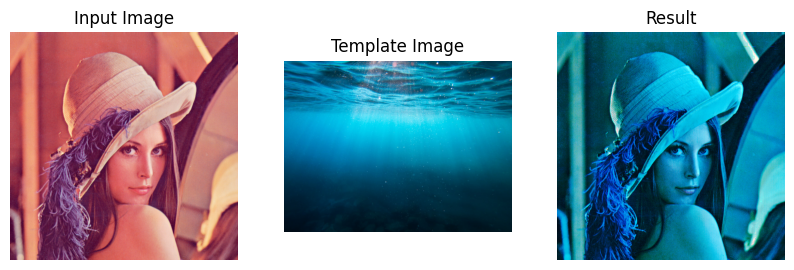

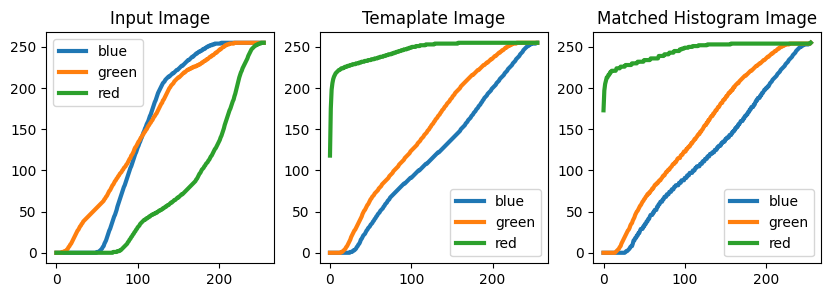

In [95]:
# create a matrix for result
img = cv2.imread(r"C:\Users\srsau.DESKTOP-T9VMR06.000\Desktop\109_image\lena.png")
imgTemplate = cv2.imread(r"C:\Users\srsau.DESKTOP-T9VMR06.000\Desktop\109_image\Water.jpg")
imgResult = np.zeros((img.shape)).astype(np.uint8)

# cdf and histogram
for channel in range(3):
    cdfInput = CDF(img[:,:,channel])
    cdfTemplate = CDF(imgTemplate[:,:,channel])
    imgResult[:,:,channel] = histMatch(cdfInput, cdfTemplate, img[:,:,channel])
plotResult(img[:,:,::-1], imgTemplate[:,:,::-1], imgResult[:,:,::-1])    


#cdf for the image before and after matching..
b,g,r = cv2.split(img)
tb,tg,tr = cv2.split(imgTemplate) 
mb,mg,mr = cv2.split(imgResult)

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(CDF(b), linewidth=3, label='blue')
plt.plot(CDF(g), linewidth=3, label='green')
plt.plot(CDF(r), linewidth=3, label='red')
plt.legend()
plt.title("Input Image")

plt.subplot(1,3,2)
plt.plot(CDF(tb), linewidth=3, label='blue')
plt.plot(CDF(tg), linewidth=3, label='green')
plt.plot(CDF(tr), linewidth=3, label='red')
plt.legend()
plt.title("Temaplate Image")

plt.subplot(1,3,3)
plt.plot(CDF(mb), linewidth=3, label='blue')
plt.plot(CDF(mg), linewidth=3, label='green')
plt.plot(CDF(mr), linewidth=3, label='red')
plt.legend()
plt.title("Matched Histogram Image")
plt.show()